# Exploring the Relationship Between Quality of Life and Cost of Living

Aarnav Kunde

## 1. Introduction

For the final project of the semester, we were interested in studying the Quality of Life and Cost of Living City Data which, according to our assumption, is a random sample of 100 global cities.

## Motivation
We chose this dataset to develop a better understanding of the relationships between various cost of living and quality of life metrics and ideally leverage those relationships to predict certain city valuation factors such as quality of life, crime rating, and purchase power.

## Research Questions
We plan to answer the following 4 sets of research questions that support our motivation for exploring this dataset:
1. *What is the relationship between the **Average Rent** and the **Average Disposable Income** for a global city, moreover does this relationship change for different values for **Purchasing Power**?* Utilizing descriptive analytics and multiple visualizations, we seek to answer these questions. Across the 100 global cities, the value of these three variables are quite different due to other factors such as population, political state, etc., but they seem closely related enough that it's worth to explore if there's a relationship between them that holds regardless of the differences between the cities.

2. *Is there an association between **Average Disposable Income** and **Crime Rating**?* We plan to explore this question through inferential research, specifically a confidence interval and a hypothesis test. We chose this question as we were curious whether having a higher or lower average disposable income necessarily influences a city's crime rating.

3. *Is there a linear relationship between **quality of life** and **cappuccino price**, **cinema price**, **health care rating**, and **pollution rating** in this sample?* We will research this relationship by writing a linear regression using these variables and analyzing its results. Health care and pollution ratings are explanatory variables that typically go hand in hand when exploring the overall quality of life of a city so the choice of these two was quite obvious. We were also curious about the impact of cappuccino and cinema tickets on quality of life because they are contributors to GDP which often is attributed as a measure of quality of life. 

4. *Is there a linear relationship between the log-odds of the success level of **average rent** to be greater than the average across all 100 cities and **average disposable income**, **quality of life**, **crime rating**, and **healthcare rating** in the sample? What explanatory variables should we include in the model to build a parsimonious model?*  We plan to fit a parsimonious logistic regression to answer this research question. This question builds on our first research question to further explore the average cost of rent across a variety of quality of life metrics for different cities around the globe.

In [2]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
mhub = pd.read_csv('movehub_data.csv')

In [4]:
mhub

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
0,Geneva,Switzerland,2.80,12.94,10.49,1.28,2607.95,3917.72,83.27,61.22,74.88,29.43,82.76,54.36
1,Athens,Greece,2.98,6.82,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
2,Detroit,United States,1.96,5.56,7.85,0.67,632.19,1895.93,70.63,73.81,63.05,83.45,50.99,76.69
3,Regina,Canada,2.65,7.65,9.56,0.80,956.27,1912.54,82.07,60.80,60.24,84.07,79.98,41.56
4,Nottingham,United Kingdom,2.49,7.97,4.98,1.37,797.16,1793.60,80.42,53.57,79.63,24.54,75.88,44.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
96,Lyon,France,2.13,7.67,4.69,1.19,895.11,1704.96,84.78,56.05,88.65,37.21,71.13,47.27
97,Leeds,United Kingdom,1.99,7.60,6.33,1.38,797.16,1992.89,82.57,63.88,81.48,18.48,78.06,28.91
98,Lagos,Nigeria,2.62,6.54,7.85,0.40,1193.13,350.79,72.47,14.91,62.04,26.63,19.48,60.44


## 2. Descriptive Analytics

What is the relationship between the Average Rent and the Average Disposable Income of the property, moreover does this relationship change for different values for Purchasing Power?

In [5]:
mhub.dropna(subset=['Avg_Rent', 'Avg_Disposable_Income', 'Purchase_Power'])

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
0,Geneva,Switzerland,2.80,12.94,10.49,1.28,2607.95,3917.72,83.27,61.22,74.88,29.43,82.76,54.36
1,Athens,Greece,2.98,6.82,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
2,Detroit,United States,1.96,5.56,7.85,0.67,632.19,1895.93,70.63,73.81,63.05,83.45,50.99,76.69
3,Regina,Canada,2.65,7.65,9.56,0.80,956.27,1912.54,82.07,60.80,60.24,84.07,79.98,41.56
4,Nottingham,United Kingdom,2.49,7.97,4.98,1.37,797.16,1793.60,80.42,53.57,79.63,24.54,75.88,44.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
96,Lyon,France,2.13,7.67,4.69,1.19,895.11,1704.96,84.78,56.05,88.65,37.21,71.13,47.27
97,Leeds,United Kingdom,1.99,7.60,6.33,1.38,797.16,1992.89,82.57,63.88,81.48,18.48,78.06,28.91
98,Lagos,Nigeria,2.62,6.54,7.85,0.40,1193.13,350.79,72.47,14.91,62.04,26.63,19.48,60.44


In [6]:
mhub['Purchase_Power'].median()

45.19

In [7]:
highpp = mhub[mhub['Purchase_Power']> 45.19]

In [8]:
lowpp = mhub[mhub['Purchase_Power']<45.19]

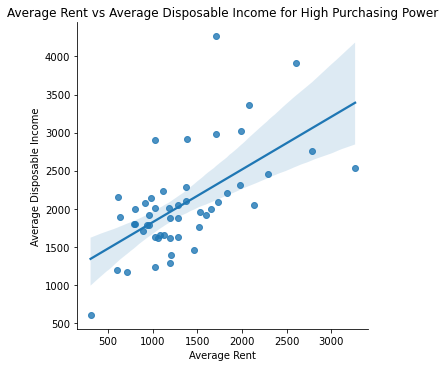

In [9]:
sns.lmplot(x='Avg_Rent', y='Avg_Disposable_Income', data = highpp)
plt.title('Average Rent vs Average Disposable Income for High Purchasing Power')
plt.xlabel('Average Rent')
plt.ylabel('Average Disposable Income')
plt.show()

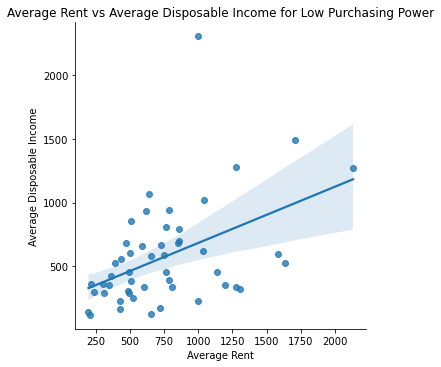

In [10]:
sns.lmplot(x='Avg_Rent', y='Avg_Disposable_Income', data = lowpp)
plt.title('Average Rent vs Average Disposable Income for Low Purchasing Power')
plt.xlabel('Average Rent')
plt.ylabel('Average Disposable Income')
plt.show()

In [11]:
print(' Based on the visualizations, we find that both high and low purchasing powers form a somewhat positive, linear relationship between Average Rent and Average Disposable Income ')

 Based on the visualizations, we find that both high and low purchasing powers form a somewhat positive, linear relationship between Average Rent and Average Disposable Income 


## 3. Inference

Is there an association between Average Disposable Income and Crime Rating?

In [12]:
inf = pd.read_csv('movehub_data.csv')[['Avg_Disposable_Income', 'Crime_Rating']]
inf['Avg_Disposable_Income'].median()

1253.15

In [13]:
lowinc = inf['Crime_Rating'][inf["Avg_Disposable_Income"]<1253.15]
highinc = inf['Crime_Rating'][inf["Avg_Disposable_Income"]>1253.15]

In [14]:
n_low = len(lowinc)
mean_low = lowinc.mean()
std_low = lowinc.std()

print('sample size:',n_low)
print('sample mean:', mean_low)
print('sample std:', std_low)

sample size: 50
sample mean: 47.553599999999996
sample std: 16.88915093865205


In [15]:
n_hi = len(highinc)
mean_hi = highinc.mean()
std_hi = highinc.std()

print('sample size:',n_hi)
print('sample mean:', mean_hi)
print('sample std:', std_hi)

sample size: 50
sample mean: 41.462999999999994
sample std: 15.189315558735922


In [16]:
print('Constructing a 95% confidence interval for sample mean differences. Both have sample sizes greater than 30, and the sample sizes are lesss than 10% of all form the movehub population. Both of these samples have independent observations. Thus, we find that our conditions for constructing an interval are met.')

Constructing a 95% confidence interval for sample mean differences. Both have sample sizes greater than 30, and the sample sizes are lesss than 10% of all form the movehub population. Both of these samples have independent observations. Thus, we find that our conditions for constructing an interval are met.


In [17]:
low_count = len(lowinc)
low_mean = lowinc.mean()
low_std = lowinc.std()

high_count = len(highinc)
high_mean = highinc.mean()
high_std = highinc.std()

cv = t.ppf(0.975, df = 49)
pe = low_mean - high_mean
se = np.sqrt((low_std**2)/low_count + (high_std**2)/high_count)

lb = pe - cv * se
ub = pe + cv * se

print('95% CI:', lb, ub)

95% CI: -0.36485337710042476 12.546053377100428


In [18]:
print("Hypothesis Test: H0: Sample mean difference is 0. Ha: Sample mean difference is not 0. As seen above, both the samples clear the Central Limit Theorem conditions for sample mean differences.")

Hypothesis Test: H0: Sample mean difference is 0. Ha: Sample mean difference is not 0. As seen above, both the samples clear the Central Limit Theorem conditions for sample mean differences.


In [19]:
ts = (pe - 0) / se
print('Test statistic:',ts)
pvalue = 2*(1-t.cdf(np.abs(ts), df = 49))
print('p-value:', pvalue)

Test statistic: 1.8959967965375595
p-value: 0.06386541390772771


In [20]:
print('Because the P-value is greater than our alpha level of .05, we fail to reject the null hypothesis. There is not enough evidence to support the claim that the difference in sample means is not zero. Or that we do not have enough evidence to suggest an association between Average Disposable Income and Crime Rating.')

Because the P-value is greater than our alpha level of .05, we fail to reject the null hypothesis. There is not enough evidence to support the claim that the difference in sample means is not zero. Or that we do not have enough evidence to suggest an association between Average Disposable Income and Crime Rating.


## 4. Linear Regression

Is there a linear relationship between **quality of life** and **cappuccino price**, **cinema price**, **health care rating**, and **pollution rating** in this sample?

In [21]:
mhub

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating
0,Geneva,Switzerland,2.80,12.94,10.49,1.28,2607.95,3917.72,83.27,61.22,74.88,29.43,82.76,54.36
1,Athens,Greece,2.98,6.82,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
2,Detroit,United States,1.96,5.56,7.85,0.67,632.19,1895.93,70.63,73.81,63.05,83.45,50.99,76.69
3,Regina,Canada,2.65,7.65,9.56,0.80,956.27,1912.54,82.07,60.80,60.24,84.07,79.98,41.56
4,Nottingham,United Kingdom,2.49,7.97,4.98,1.37,797.16,1793.60,80.42,53.57,79.63,24.54,75.88,44.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
96,Lyon,France,2.13,7.67,4.69,1.19,895.11,1704.96,84.78,56.05,88.65,37.21,71.13,47.27
97,Leeds,United Kingdom,1.99,7.60,6.33,1.38,797.16,1992.89,82.57,63.88,81.48,18.48,78.06,28.91
98,Lagos,Nigeria,2.62,6.54,7.85,0.40,1193.13,350.79,72.47,14.91,62.04,26.63,19.48,60.44


In [22]:
results = smf.ols('Quality_of_Life ~ Cappuccino+Cinema+Health_Care+Pollution', data=mhub).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Quality_of_Life   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     27.60
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           3.30e-15
Time:                        16:10:14   Log-Likelihood:                -414.59
No. Observations:                 100   AIC:                             839.2
Df Residuals:                      95   BIC:                             852.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.0797      8.443     -0.602      0.549     -21.841      11.682
Cappuccino      5.2173      3.352      1.557      0.123      -1.437      11.872
Cinema          2.2131      1.001      2.211      0.029       0.226       4.200
Health_Care     0.6462      0.115      5.642      0.000       0.419       0.874
Pollution      -0.0866      0.064     -1.360      0.177      -0.213       0.040
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.762
Skew:                          -0.378   Prob(JB):                        0.251
Kurtosis:                       2.697   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression Equation

$\hat{y} = $ -5.0797 + Cappuccino(5.2173) + Cinema(2.2131) + Health_Care(0.6462)) + Pollution(-0.0866)

## Checking multiple linear regression conditions

**Condition 1:** Linearity Condition

Because the distribution of points in thep lot are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

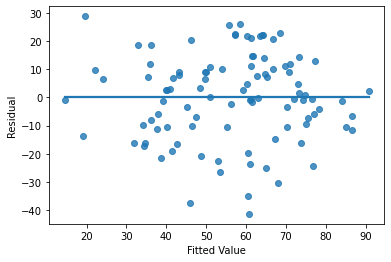

In [23]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Condition 2:** Constant Variability of Residuals Condition

Nearly all of the residuals follow constant variability so this condition is met.

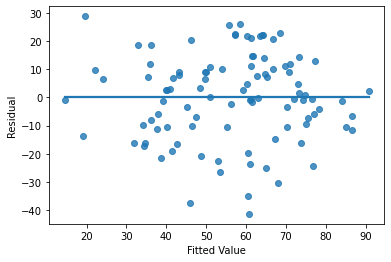

In [24]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Condition 3:** Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is slightly skewed to the left, the assumption that the residuals are normally distributed are slightly not met. However, the mean is about 0.

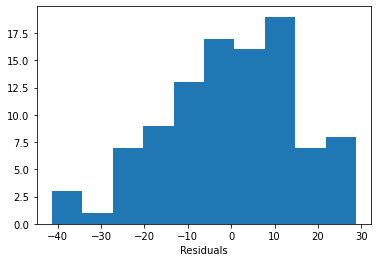

In [25]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

**Condition 4:** Independence of Residuals Condition

- The data is randomly sampled
- The sample size 100 < 10% of all cities across the globe.

Thus the condition for indpendence of residuals may not be violated in this particular way.

**Condition 5:** No Multicollinearity Condition

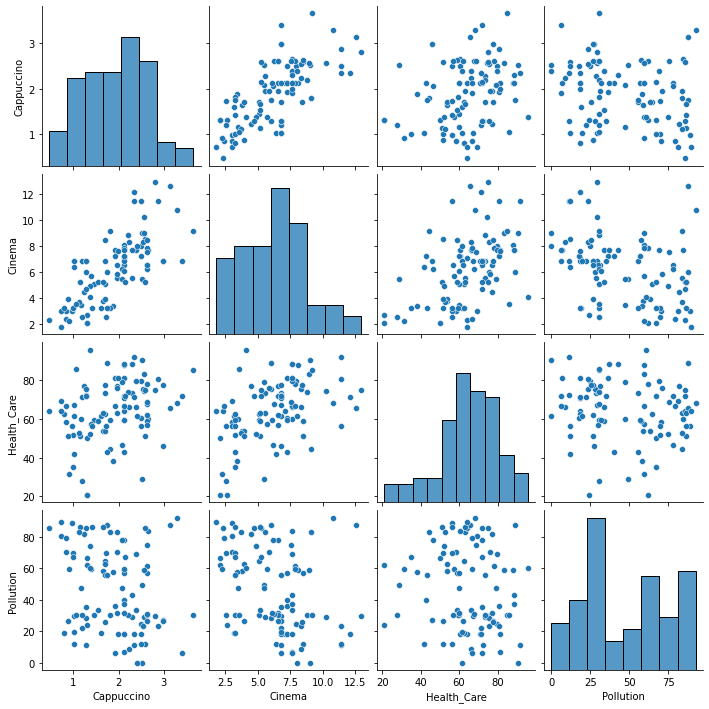

In [64]:
sns.pairplot(mhub[['Cappuccino', 'Cinema', 'Health_Care', 'Pollution']])
plt.show()

In [27]:
mhub[['Cappuccino', 'Cinema', 'Health_Care', 'Pollution']].corr()

,Cappuccino,Cinema,Health_Care,Pollution
Cappuccino,1.000000,0.727481,0.310350,-0.256079
Cinema,0.727481,1.000000,0.459375,-0.363948
Health_Care,0.310350,0.459375,1.000000,-0.148637
Pollution,-0.256079,-0.363948,-0.148637,1.000000


## Variability

In [28]:
r_squared = 0.537
r_squared
mhub.iloc[0]

City                          Geneva
Country                  Switzerland
Cappuccino                       2.8
Cinema                         12.94
Wine                           10.49
Gasoline                        1.28
Avg_Rent                     2607.95
Avg_Disposable_Income        3917.72
Movehub_Rating                 83.27
Purchase_Power                 61.22
Health_Care                    74.88
Pollution                      29.43
Quality_of_Life                82.76
Crime_Rating                   54.36
Name: 0, dtype: object

## Prediction

We will predict the quality of life rating for a city whose average cost of Cappuccino is 2.80, average cost of a Cinema ticket is 12.94, health care rating is 74.88, and pollution rating is 29.43

In [29]:
prediction = results.predict(exog=dict(mhub.iloc[0]))
print("Predicted quality of life rating:", prediction[0])
print("Actual quality of life rating:", mhub.iloc[0]['Quality_of_Life'])

Predicted quality of life rating: 84.00826666506762
Actual quality of life rating: 82.76


## Results

Although our prediction through the model produced a very close estimated quality of life rating to the actual value, this model still only represents 53.7% of variation as a result of the selected parameters. Therefore, the linear relationship between cappuccino, cinema, healthcare rating, and pollution rating is moderate.

## 5. Logistic Regression

Is there a linear relationship between the log-odds of the success level of **average rent** to be greater than the average across all 100 cities and **average disposable income**, **quality of life**, **crime rating**, and **healthcare rating** in the sample? What explanatory variables should we include in the model to build a parsimonious model?

## Clean & Map Data

In [30]:
data = pd.read_csv('movehub_data.csv')
data.dropna(subset = ['Avg_Disposable_Income', 'Quality_of_Life', 'Crime_Rating', 'Health_Care'])
data['y'] = 1*(data['Avg_Rent']>=data['Avg_Rent'].mean())

## Split into Training and Test

In [31]:
data_train, data_test = train_test_split(data, test_size=0.20, random_state=123)
data_train

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,y
35,Casablanca,Morocco,1.70,3.94,3.45,0.85,997.08,230.09,68.27,13.20,53.70,62.97,48.69,38.28,0
88,Gaborone,Botswana,1.19,2.58,3.53,0.71,395.15,529.22,75.32,30.98,27.78,30.55,31.77,50.00,0
19,Toulouse,France,1.92,7.25,4.26,1.28,1022.98,2011.86,82.10,54.47,81.01,36.23,66.66,47.27,0
29,Lausanne,Switzerland,3.15,12.59,8.40,1.32,1714.00,4266.11,87.21,90.77,65.85,87.62,73.21,35.55,1
31,Florence,Italy,1.02,6.82,4.26,1.53,1278.72,1278.72,76.63,35.31,67.11,29.44,53.73,39.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Leicester,United Kingdom,2.49,7.22,5.27,1.43,787.19,1793.60,83.36,71.88,60.64,18.04,76.19,24.22,0
83,Montevideo,Uruguay,2.13,6.06,5.23,1.24,653.77,585.12,71.69,21.56,59.72,31.72,44.63,50.16,0
17,Boston,United States,2.62,7.85,7.85,0.65,2288.19,2451.63,82.20,59.28,78.04,61.77,82.81,40.69,1
92,Hyderabad,India,0.72,1.81,4.83,0.91,241.35,301.69,79.35,39.93,63.89,89.72,54.97,36.90,0


## Backwards Elimination Using BIC

In [32]:
current_mod=smf.logit('y~Avg_Disposable_Income+Quality_of_Life+Crime_Rating+Health_Care', data=data_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.472122
         Iterations 7
ITERATION 1: BIC of the Current Model 97.4496296195378


In [50]:
test_mod1=smf.logit('y~Quality_of_Life+Crime_Rating+Health_Care', data=data_train).fit()
print('BIC of Test Model that Deletes Average Disposable Income from the Current Model',test_mod1.bic)
test_mod2=smf.logit('y~Avg_Disposable_Income+Crime_Rating+Health_Care', data=data_train).fit()
print('BIC of Test Model that Deletes Quality of Life from the Current Model',test_mod2.bic)
test_mod3=smf.logit('y~Avg_Disposable_Income+Quality_of_Life+Health_Care', data=data_train).fit()
print('BIC of Test Model that Deletes Crime Rating from the Current Model',test_mod3.bic)
test_mod4=smf.logit('y~Avg_Disposable_Income+Quality_of_Life+Crime_Rating', data=data_train).fit()
print('BIC of Test Model that Deletes Healthcare Rating from the Current Model',test_mod4.bic)

Optimization terminated successfully.
         Current function value: 0.597636
         Iterations 6
BIC of Test Model that Deletes Average Disposable Income from the Current Model 113.1497913674278
Optimization terminated successfully.
         Current function value: 0.521362
         Iterations 6
BIC of Test Model that Deletes Quality of Life from the Current Model 100.94596379231096
Optimization terminated successfully.
         Current function value: 0.485057
         Iterations 6
BIC of Test Model that Deletes Crime Rating from the Current Model 95.13724203743747
Optimization terminated successfully.
         Current function value: 0.499038
         Iterations 6
BIC of Test Model that Deletes Healthcare Rating from the Current Model 97.37420402481872


In [51]:
current_mod=smf.logit('y~Avg_Disposable_Income+Quality_of_Life+Health_Care', data=data_train).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.485057
         Iterations 6
ITERATION 2: BIC of the Current Model 95.13724203743747


In [52]:
test_mod1=smf.logit('y~Quality_of_Life+Health_Care', data=data_train).fit()
print('BIC of Test Model that Deletes Average Disposable Income from the Current Model',test_mod1.bic)
test_mod2=smf.logit('y~Avg_Disposable_Income+Health_Care', data=data_train).fit()
print('BIC of Test Model that Deletes Quality of Life from the Current Model',test_mod2.bic)
test_mod3=smf.logit('y~Avg_Disposable_Income+Quality_of_Life', data=data_train).fit()
print('BIC of Test Model that Deletes Health Care Rating from the Current Model',test_mod3.bic)

Optimization terminated successfully.
         Current function value: 0.597683
         Iterations 6
BIC of Test Model that Deletes Average Disposable Income from the Current Model 108.77535526801194
Optimization terminated successfully.
         Current function value: 0.521486
         Iterations 6
BIC of Test Model that Deletes Quality of Life from the Current Model 96.58383786745965
Optimization terminated successfully.
         Current function value: 0.510742
         Iterations 6
BIC of Test Model that Deletes Health Care Rating from the Current Model 94.86484027299547


In [36]:
current_mod=smf.logit('y~Avg_Disposable_Income+Quality_of_Life', data=data_train).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.510742
         Iterations 6
ITERATION 3: BIC of the Current Model 94.86484027299547


In [53]:
test_mod1=smf.logit('y~Quality_of_Life', data=data_train).fit()
print('BIC of Test Model that Deletes Average Disposable Income from the Current Model',test_mod1.bic)
test_mod2=smf.logit('y~Avg_Disposable_Income', data=data_train).fit()
print('BIC of Test Model that Deletes Quality of Life from the Current Model',test_mod2.bic)

Optimization terminated successfully.
         Current function value: 0.616370
         Iterations 5
BIC of Test Model that Deletes Average Disposable Income from the Current Model 107.38324818855793
Optimization terminated successfully.
         Current function value: 0.528285
         Iterations 6
BIC of Test Model that Deletes Quality of Life from the Current Model 93.28965194518645


## Fit Final Model

In [54]:
final_mod=smf.logit('y~Avg_Disposable_Income', data=data_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.528285
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                  0.2205
Time:                        16:13:22   Log-Likelihood:                -42.263
converged:                       True   LL-Null:                       -54.220
Covariance Type:            nonrobust   LLR p-value:                 1.007e-06
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.3030      0.552     -4.170      0.000      -3.386      -1.221
Avg_Disposable_Income     0.0014      0.000      4.162      0.000       0.001       0.002
=========================================================================================
"""

## Logistic Equation

$log(\frac{\hat{p}}{1-\hat{p}}) = -2.303 + 0.0014(Avg Disposable Income)$

## Calculate ROC & AUC

In [55]:
data_test['test']=final_mod.predict(exog=data_test)
data_test.head()

<ipython-input-55-2a0b026dd53f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['test']=final_mod.predict(exog=data_test)


,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,y,test,predictive_prob,pred_0.38
8,Bangalore,India,0.72,3.02,4.83,0.91,362.03,422.37,77.92,38.67,69.38,80.94,52.11,51.03,0,0.154426,0.090964,0
70,Marseille,France,1.70,8.44,4.26,1.32,1022.98,1236.10,81.62,57.05,77.53,25.59,59.87,47.27,0,0.368394,0.333797,0
82,Chiang Mai,Thailand,1.05,3.53,11.40,0.82,426.24,227.95,68.64,15.89,85.91,30.55,37.50,37.78,0,0.121561,0.097488,0
28,Milan,Italy,1.19,6.82,4.26,1.53,1704.96,1491.84,81.90,43.43,71.36,22.09,40.80,56.20,1,0.456567,0.644077,1
63,Kuala Lumpur,Malaysia,1.72,2.57,10.72,0.41,857.82,702.18,77.88,37.09,56.21,69.65,42.40,68.91,0,0.213995,0.214111,0


In [56]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [57]:
fpr, tpr, score = roc_curve(y_true=data_test['y'], y_score=data_test['test'])
auc = roc_auc_score(y_true=data_test['y'], y_score=data_test['test'])
print(auc)

0.8229166666666667


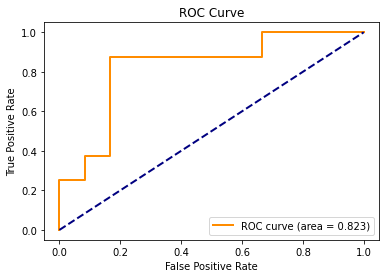

In [58]:
plot_roc(fpr, tpr, auc)

In [59]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(data_test['y'], data_test['test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold  tpr  fpr
0       0.02  1.0  1.0
   threshold  tpr  fpr
0       0.03  1.0  1.0
   threshold  tpr  fpr
0       0.04  1.0  1.0
   threshold  tpr  fpr
0       0.05  1.0  1.0
   threshold  tpr  fpr
0       0.06  1.0  1.0
   threshold  tpr  fpr
0       0.07  1.0  1.0
   threshold  tpr  fpr
0       0.08  1.0  1.0
   threshold  tpr  fpr
0       0.09  1.0  1.0
   threshold  tpr  fpr
0        0.1  1.0  1.0
   threshold  tpr  fpr
0       0.11  1.0  1.0
   threshold  tpr  fpr
0       0.12  1.0  1.0
   threshold  tpr       fpr
0       0.13  1.0  0.916667
   threshold  tpr       fpr
0       0.14  1.0  0.916667
   threshold  tpr       fpr
0       0.15  1.0  0.833333
   threshold  tpr   fpr
0       0.16  1.0  0.75
   threshold  tpr   fpr
0       0.17  1.0  0.75
   threshold  tpr   fpr
0       0.18  1.0  0.75
   threshold  tpr       fpr
0       0.19  1.0  0.666667
   threshold    tpr       fpr
0   

## Choose Threshold

We would want to choose a threshold that maximizes the tpr but minimizes the fpr. Based on the values that we see above, the threshold that does this best is around 0.38.

### Classify Test Data

In [60]:
pred_probabilities=final_mod.predict(exog=dict(data_test)) 
data_test['predictive_prob']=pred_probabilities
data_test

<ipython-input-60-a39937f79a37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['predictive_prob']=pred_probabilities


,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,y,test,predictive_prob,pred_0.38
8,Bangalore,India,0.72,3.02,4.83,0.91,362.03,422.37,77.92,38.67,69.38,80.94,52.11,51.03,0,0.154426,0.154426,0
70,Marseille,France,1.70,8.44,4.26,1.32,1022.98,1236.10,81.62,57.05,77.53,25.59,59.87,47.27,0,0.368394,0.368394,0
82,Chiang Mai,Thailand,1.05,3.53,11.40,0.82,426.24,227.95,68.64,15.89,85.91,30.55,37.50,37.78,0,0.121561,0.121561,0
28,Milan,Italy,1.19,6.82,4.26,1.53,1704.96,1491.84,81.90,43.43,71.36,22.09,40.80,56.20,1,0.456567,0.456567,1
63,Kuala Lumpur,Malaysia,1.72,2.57,10.72,0.41,857.82,702.18,77.88,37.09,56.21,69.65,42.40,68.91,0,0.213995,0.213995,0
0,Geneva,Switzerland,2.80,12.94,10.49,1.28,2607.95,3917.72,83.27,61.22,74.88,29.43,82.76,54.36,1,0.963999,0.963999,1
5,Lima,Peru,1.65,3.79,6.27,1.03,784.52,392.26,73.19,23.22,53.70,58.49,22.67,65.31,0,0.148899,0.148899,0
50,Beijing,China,2.64,8.46,10.36,0.86,1586.25,600.13,74.17,22.97,58.90,57.18,25.69,47.61,1,0.190520,0.190520,0
81,Seoul,South Korea,2.59,5.25,11.67,1.17,1458.20,1458.20,82.43,54.30,75.00,85.59,60.28,21.35,1,0.444683,0.444683,1
4,Nottingham,United Kingdom,2.49,7.97,4.98,1.37,797.16,1793.60,80.42,53.57,79.63,24.54,75.88,44.38,0,0.563760,0.563760,1


In [61]:
data_test['pred_0.38']=1*(data_test['predictive_prob']>0.38)
data_test

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
tn, fp, fn, tp = confusion_matrix(y_true=data_test['y'], 
                                  y_pred=data_test['pred_0.38']).ravel()
(tn, fp, fn, tp)

<ipython-input-61-015b773e36ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pred_0.38']=1*(data_test['predictive_prob']>0.38)


(10, 2, 1, 7)

In [62]:
false_positive_rate=fp/(tn+fp)
false_positive_rate

0.16666666666666666

In [63]:
sensitivity=tp /(tp+fn)
sensitivity

0.875

### Results

Our research shows us that the variables that we should include to create a parsimonious model are average disposable income and quality of life. Based on the sensitivity rate, we can see that our model does a good job in predicting whether or not the average rent for a given city will be greater than the average across all 100 cities.

## 6. Conclusion

## Summarization

After conducting research to explore each research question, we would like to present our findings:

1. Cities that had a purchasing power higher than the overall median, tended to have a higher average disposable income as rent increased, in comparison to cities with a purchasing power that was lower than the median.

2. There was **insufficient evidence** to suggest that there is an association between Average Disposable Income and Crime Rating.

3. The linear relationship between Cappuccino price, Cinema price, Health Care rating, and Pollution rating to estimate the quality of life for a given city is **weak**.

4. The final model suggest that there is a **moderately strong** linear relationship between the explanatory variables and the log-odds of the success level that a city's average rent is greater than the total average of rent across the globe.

### Future Work

If further examination was to be done on this dataset, some additional research could be conducted on the relationships between small contributors to GDP like Wine and Gasoline and Average Disposable Income. Furthermore, promising research can be done on how the population influences the data whether that's the number of people, gender distribution, or age distribution.